# WorkFlow
## Load the data
## Clean the data
## Visualize
## Feature Enginnering
## test modelling
## preproccessing
## modelling

In [1]:
PROJECT_NAME = "House-Sales-in-King-County-USA"

## Load the data

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('./data.csv')

## Cleaning the data

In [4]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
import seaborn as sns

<AxesSubplot:>

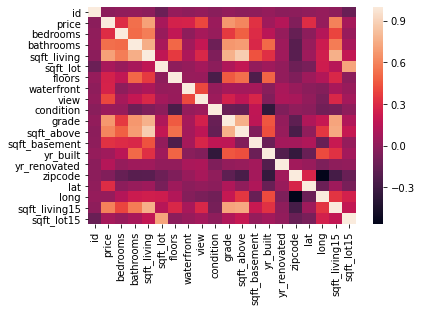

In [6]:
sns.heatmap(data.corr())

In [7]:
data.drop(['id','sqft_lot','waterfront','view','grade','sqft_above','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15'],axis=1,inplace=True)

<AxesSubplot:>

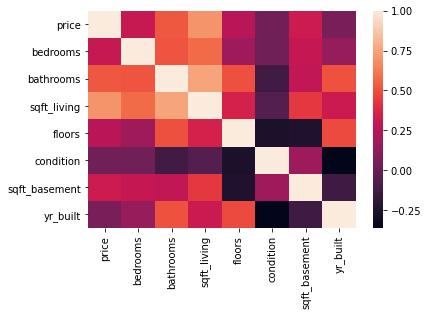

In [8]:
sns.heatmap(data.corr())

In [9]:
data.drop(['floors','condition'],axis=1,inplace=True)

<AxesSubplot:>

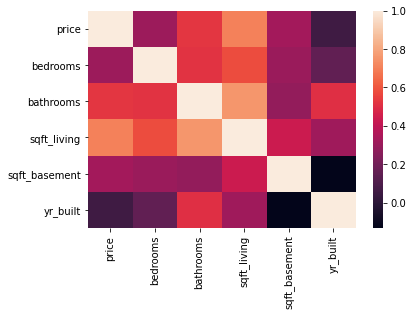

In [10]:
sns.heatmap(data.corr())

In [11]:
data.drop(['sqft_basement'],axis=1,inplace=True)

<AxesSubplot:>

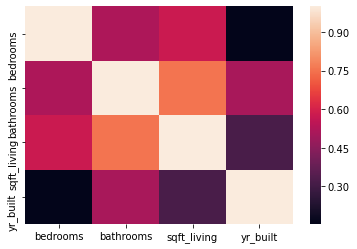

In [12]:
sns.heatmap(data.drop('price',axis=1).corr())

In [13]:
data.isna().sum()

date           0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
yr_built       0
dtype: int64

In [14]:
from sklearn.model_selection import *
from sklearn.metrics import *

## Visualizing

In [15]:
import matplotlib.pyplot as plt

In [16]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'yr_built'], dtype='object')

<AxesSubplot:>

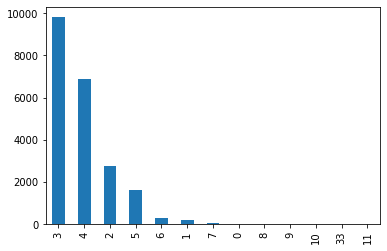

In [17]:
data['bedrooms'].value_counts().plot.bar()

<AxesSubplot:>

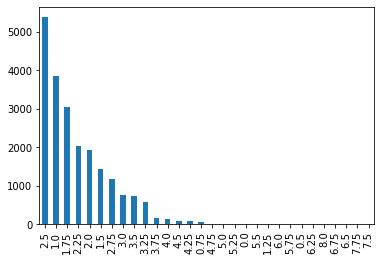

In [18]:
data['bathrooms'].value_counts().plot.bar()

## Feature Enginnering

In [19]:
results = {}

In [20]:
from tqdm import tqdm

In [21]:
data = data.drop('date',axis=1)

In [22]:
cols = ['price']
for col in tqdm(cols):
    data[col].astype(int)
    old = len(data)
    max_no = data[col].quantile(0.99)
    min_no = data[col].quantile(0.05)
    data = data[data[col] > min_no]
    data = data[data[col] < max_no]
    new = len(data)
    results[col] = {'old':old,'new':new}

100%|██████████| 1/1 [00:00<00:00, 96.93it/s]


In [23]:
len(data)

20306

In [24]:
X = data.drop('price',axis=1)
y = data['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

## test modelling

In [25]:
import torch.nn as nn
import torch

In [26]:
class Test_Model(nn.Module):
    def __init__(self,activation=nn.ReLU()):
        super().__init__()
        self.input = nn.Linear(len(X.columns),32)
        self.fc1 = nn.Linear(32,64)
        self.fc2 = nn.Linear(64,128)
        self.fc3 = nn.Linear(128,256)
        self.output = nn.Linear(256,1)
        self.activation = activation
    
    def forward(self,X,activation=True):
        y_preds = self.input(X)
        y_preds = self.fc1(y_preds)
        y_preds = self.fc2(y_preds)
        y_preds = self.fc3(y_preds)
        y_preds = self.output(y_preds)
        if activation:
            y_preds = self.activation(y_preds)
        return y_preds

In [27]:
import wandb

In [28]:
import numpy as np

In [31]:
epochs = 100
model = Test_Model()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
criterion = nn.L1Loss()
X_train = torch.from_numpy(np.array(X_train).astype(np.float32))
X_test = torch.from_numpy(np.array(X_test).astype(np.float32))
y_train = torch.from_numpy(np.array(y_train).astype(np.float32))
y_test = torch.from_numpy(np.array(y_test).astype(np.float32))
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

In [33]:
# wandb.init(project=PROJECT_NAME,name='baseline-1')
# for _ in tqdm(range(epochs)):
#     preds = model(X_train,False)
#     loss = criterion(preds,y_train)
#     loss.backward()
#     optimizer.step()
#     optimizer.zero_grad()
#     loss = loss.item()
#     with torch.no_grad():
#         loss_test = criterion(model(X_test,False),y_test)
#         loss_test = loss_test.item()
#     sample_pred = preds[0]
#     real = y_test[0]
#     wandb.log({'loss':loss,'epoch':_,'val_loss':loss_test,'pred':sample_pred,'real':real})
# print('Done')

## Preproccessing

In [34]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,MaxAbsScaler,OneHotEncoder,LabelEncoder,Normalizer

In [36]:
X_train_old = X_train
X_test_old = X_test

In [37]:
pres = [StandardScaler(),RobustScaler(),MinMaxScaler(),MaxAbsScaler(),OneHotEncoder(),Normalizer()]
for pre in pres:
    pre.fit(X_train)
    X_test = pre.transform(X_test)
    X_train = pre.transform(X_train)
    wandb.init(project=PROJECT_NAME,name=f'pre-{pre}')
    for _ in tqdm(range(epochs)):
        preds = model(X_train,False)
        loss = criterion(preds,y_train)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss = loss.item()
        with torch.no_grad():
            loss_test = criterion(model(X_test,False),y_test)
            loss_test = loss_test.item()
        sample_pred = preds[0]
        real = y_test[0]
        wandb.log({'loss':loss,'epoch':_,'val_loss':loss_test,'pred':sample_pred,'real':real})
    X_test = X_test_old
    X_train = X_train_old

wandb: ERROR Control-C detected -- Run data was not synced


Problem at: <ipython-input-37-1b6679aaf597> 6 <module>


KeyboardInterrupt: 